In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

raqamli rasmli datamizni chaqrib olamiz


In [31]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(42, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - accuracy: 0.9166
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1150 - accuracy: 0.9657
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9754


In [35]:
val_loss ,val_acc = model.evaluate(x_test, y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.9708
0.09096158295869827 0.97079998254776


Rasmni image kurinishda kurib olamiz



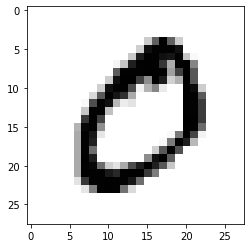

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap = plt.cm.binary)
plt.show()

In [36]:
model.save('epic.model')

In [37]:
new_model= tf.keras.models.load_model('epic.model')

In [38]:
poredict = new_model.predict([x_test])
poredict

313/313 [==============================] - 1s 3ms/step


array([[7.06631642e-09, 1.08294364e-06, 5.18099332e-05, ...,
        9.99823332e-01, 5.41439022e-07, 2.45425667e-06],
       [3.66992765e-08, 1.35518640e-04, 9.99863863e-01, ...,
        9.74219372e-10, 6.23885228e-08, 1.07060760e-09],
       [1.86404486e-06, 9.98341620e-01, 2.06877143e-04, ...,
        6.47847628e-05, 7.65192613e-04, 1.17196842e-05],
       ...,
       [3.76489062e-08, 1.56853702e-07, 3.31348133e-07, ...,
        2.50308130e-06, 1.60134186e-05, 8.16369313e-04],
       [9.00703128e-07, 4.10926077e-07, 1.18013766e-07, ...,
        3.86439268e-07, 1.69725576e-03, 1.37789238e-08],
       [1.40510838e-06, 1.08324336e-08, 1.69228798e-07, ...,
        2.79054176e-11, 1.01661826e-07, 1.52621151e-08]], dtype=float32)

In [39]:
import numpy as np
print(np.argmax(poredict[0]))

7


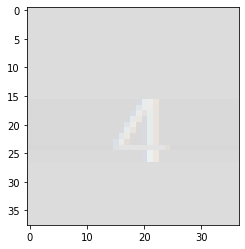

In [53]:
from PIL import Image
from numpy import asarray
image = Image.open('/content/Screenshot 2022-10-30 034521.png')
data = asarray(image)
import matplotlib.pyplot as plt
plt.imshow(x_test,cmap = plt.cm.binary)
plt.show()

In [50]:
poredict.predict(data)

AttributeError: ignored

In [51]:
data.shape

(38, 37, 4)

In [54]:
x_test = tf.keras.utils.normalize(data, axis = 1)
x_test.shape

(38, 37, 4)